In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd

df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)

In [5]:
df.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

              Unnamed: 2         \
         freq      count unique   
Category                          
ham        30         45     39   
spam        4          5      4   

                                                                 Unnamed: 3  \
                                                        top freq      count   
Category                                                                      
ham        bt not his girlfrnd... G o o d n i g h t . . .@"    3         10   
spam                                            PO Box 5249    2          2   

                                            Unnamed: 4                       
         unique                    top freq      count unique      top freq  
Category                                                                     
ham           9                     GE    2          6      5  GNT:-)"    2  
spam          1   MK17 92H. 450Ppw 16"    2          0      0      NaN  NaN

In [7]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 5)

In [9]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 5)

In [10]:
747/4825

0.15481865284974095

In [11]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 5)

In [12]:
df_balanced=pd.concat([df_ham_downsampled,df_spam])
df_balanced.shape

(1494, 5)

In [13]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [14]:
df_balanced["spam"]=df_balanced["Category"].apply(lambda x:1 if x=="spam"  else 0)
df_balanced

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
5172,ham,"Aight, text me tonight and we'll see what's up",NaN,NaN,NaN,0
1299,ham,Great to hear you are settling well. So what's...,NaN,NaN,NaN,0
1270,ham,"Sorry chikku, my cell got some problem thts y ...",NaN,NaN,NaN,0
901,ham,How is it possible to teach you. And where.,NaN,NaN,NaN,0
5029,ham,Is there coming friday is leave for pongal?do ...,NaN,NaN,NaN,0
...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,1


In [15]:
df_balanced.sample(5)

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
2790,spam,UÛªve Bin Awarded å£50 to Play 4 Instant Cash...,NaN,NaN,NaN,1
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,NaN,NaN,NaN,1
3317,ham,I'm freezing and craving ice. Fml,NaN,NaN,NaN,0
4044,ham,If You mean the website. Yes.,NaN,NaN,NaN,0
3707,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [18]:
X_train.head(4)

3980    Huh i cant thk of more oredi how many pages do...
3979                                   ringtoneking 84484
347                       One small prestige problem now.
1088    You are awarded a SiPix Digital Camera! call 0...
Name: Message, dtype: object

In [19]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [20]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.5132726 , -0.8884572 , ..., -0.74748856,
        -0.75314724,  0.91964495],
       [-0.8720835 , -0.50543964, -0.94446677, ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [21]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [23]:
cosine_similarity([e[3]],[e[4]])

array([[0.98720354]], dtype=float32)

In [24]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [26]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [27]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
35/35 [==============================] - 507s 14s/step - loss: 0.5791 - accuracy: 0.7411 - precision: 0.7419 - recall: 0.7393
Epoch 2/5
35/35 [==============================] - 462s 13s/step - loss: 0.4724 - accuracy: 0.8295 - precision: 0.8176 - recall: 0.8482
Epoch 3/5
35/35 [==============================] - 438s 13s/step - loss: 0.4121 - accuracy: 0.8500 - precision: 0.8415 - recall: 0.8625
Epoch 4/5
35/35 [==============================] - 466s 13s/step - loss: 0.3740 - accuracy: 0.8607 - precision: 0.8424 - recall: 0.8875
Epoch 5/5
35/35 [==============================] - 546s 16s/step - loss: 0.3438 - accuracy: 0.8830 - precision: 0.8743 - recall: 0.8946


In [29]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 149s 13s/step - loss: 0.3346 - accuracy: 0.8877 - precision: 0.9050 - recall: 0.8663


[0.3346153199672699, 0.8877005577087402, 0.9050279259681702, 0.866310179233551]

In [30]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 148s 12s/step


In [31]:
import numpy as np
y_predicted=np.where(y_predicted>0.5,1,0)

In [32]:
y_predicted

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[170,  17],
       [ 25, 162]], dtype=int64)

Text(33.0, 0.5, 'Truth')

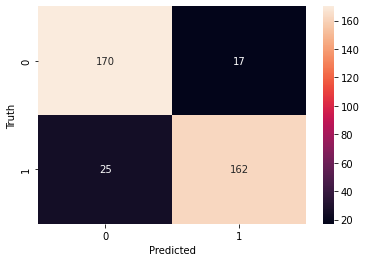

In [34]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       187
           1       0.91      0.87      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.89      0.89      0.89       374



In [36]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 6s 6s/step


array([[0.64081496],
       [0.66514647],
       [0.6435368 ],
       [0.19581336],
       [0.10946807]], dtype=float32)